In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# 데이터프레임 불러오기
economics = pd.read_csv('./datasets/resampled_data_final.csv',encoding="euc-kr")
economics['DATE'] = pd.to_datetime(economics['DATE'])

<class 'pandas.core.series.Series'>
RangeIndex: 289 entries, 0 to 288
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
287 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


In [4]:
economics.head()

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매
0,2000-01-31,0.92,0.07,27.259,4.0,1636.0,100.000,-0.193,0.579,112.0,5.45,337504.0,4666.2,288400.0,86.22,91.4251,268044.0
1,2000-02-29,0.64,-0.11,29.366,4.1,1737.0,100.571,-0.204,0.595,111.3,5.73,337504.0,4679.4,293750.0,86.42,91.7357,272020.0
2,2000-03-31,0.15,-0.47,29.842,4.0,1604.0,101.466,-0.130,0.608,107.1,5.85,370003.0,4710.2,274750.0,86.85,92.0933,275192.0
3,2000-04-30,0.41,-0.45,25.722,3.8,1626.0,102.540,-0.044,0.618,109.2,6.02,336901.0,4766.1,271600.0,87.19,92.6838,271046.0
4,2000-05-31,0.66,-0.40,28.788,4.0,1575.0,103.702,0.021,0.632,110.7,6.27,344615.0,4753.9,282250.0,87.38,92.9376,271394.0


In [5]:
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매
287,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
economics = economics.iloc[:287 , ] # 결측치 제거
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매


In [7]:
economics = economics.loc[economics['DATE'].dt.year <=2019 ]

In [8]:
# 주택가격지수. 제조업신규주문 , 경기동행종합지수는 차분하고 (변동치로 변경한다는 뜻)
# 제조업 신규주문은 앞으로 어떻게 처리할지 일단 보류
#M2와 소매판매는 변화율로 바꾸는 전처리 시행
economics.주택가격지수 = economics.주택가격지수.diff().fillna(method= 'bfill')
economics.경기동행종합 = economics.경기동행종합.diff().fillna(method= 'bfill')
economics['M2차분'] = economics.M2통화량.diff().fillna(method= 'bfill')
economics['M2변화율'] = economics.M2차분/ (economics.M2통화량.shift(1)) * 100
#economics['M2변화율'] .fillna(method = 'ffill')
economics['소매판매차분'] = economics.소매판매.diff().fillna(method='bfill')
economics['소매판매변화율'] = economics.소매판매차분/ (economics.소매판매.shift(1)) * 100


# 차분, 변화율 확인
economics[['M2통화량','M2차분','M2변화율','소매판매','소매판매차분','소매판매변화율']].head(10)
# 결측치를 다음날 데이터로 채워주기
economics['M2변화율'] = economics['M2변화율'].fillna(method = 'bfill')
economics['소매판매변화율'] = economics['소매판매변화율'].fillna(method = 'bfill')
# M2, 소매판매 원데이터를 지웠습니다.
economics.drop(['M2통화량','M2차분','소매판매','소매판매차분'],axis = 1,inplace = True)

C:\Users\gusdk\AppData\Local\Temp\ipykernel_1332\2644079706.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economics.주택가격지수 = economics.주택가격지수.diff().fillna(method= 'bfill')
C:\Users\gusdk\AppData\Local\Temp\ipykernel_1332\2644079706.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economics.경기동행종합 = economics.경기동행종합.diff().fillna(method= 'bfill')
C:\Users\gusdk\AppData\Local\Temp\ipykernel_1332\2644079706.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economics['M2차분'] = economics.M2통화량.diff().fillna(method= 'bfill')
C:\Users\gusdk\AppData\Local\Temp\ipykernel_1332\2644079706.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instea

In [9]:
economics = economics.set_index('DATE')

In [10]:
economics.head()

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,,,,,
2000-01-31,0.92,0.07,27.259,4.0,1636.0,0.571,-0.193,0.579,112.0,5.45,337504.0,288400.0,0.20,91.4251,0.282885,1.483339
2000-02-29,0.64,-0.11,29.366,4.1,1737.0,0.571,-0.204,0.595,111.3,5.73,337504.0,293750.0,0.20,91.7357,0.282885,1.483339
2000-03-31,0.15,-0.47,29.842,4.0,1604.0,0.895,-0.130,0.608,107.1,5.85,370003.0,274750.0,0.43,92.0933,0.658204,1.166091
2000-04-30,0.41,-0.45,25.722,3.8,1626.0,1.074,-0.044,0.618,109.2,6.02,336901.0,271600.0,0.34,92.6838,1.186786,-1.506584
2000-05-31,0.66,-0.40,28.788,4.0,1575.0,1.162,0.021,0.632,110.7,6.27,344615.0,282250.0,0.19,92.9376,-0.255974,0.128391


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산을 위한 함수 정의
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# VIF 계산 실행
vif_result = calculate_vif(economics)

# 결과 출력
vif_result

,Variable,VIF
0,장단기10년물국채/3개월금리차,60.569596
1,장단기10년물국채/2년물금리차,64.430290
2,국제유가,52.451189
3,실업률,211.203481
4,신규주택착공건수,59.641070
5,주택가격지수,2.633772
6,금융상태지수,7.229935
7,금융상태지수레버리지,7.585679
8,소비자감성지수,428.407759
9,기준금리,19.532790


In [ ]:
# VIF 값이 클수록 해당 변수가 다른 변수들과 상관성 강함
# '산업생산지수', '제조업신규주문','소비자감성지수', '실업률', '신규실업수당청구'

c:\Users\gusdk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\gusdk\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


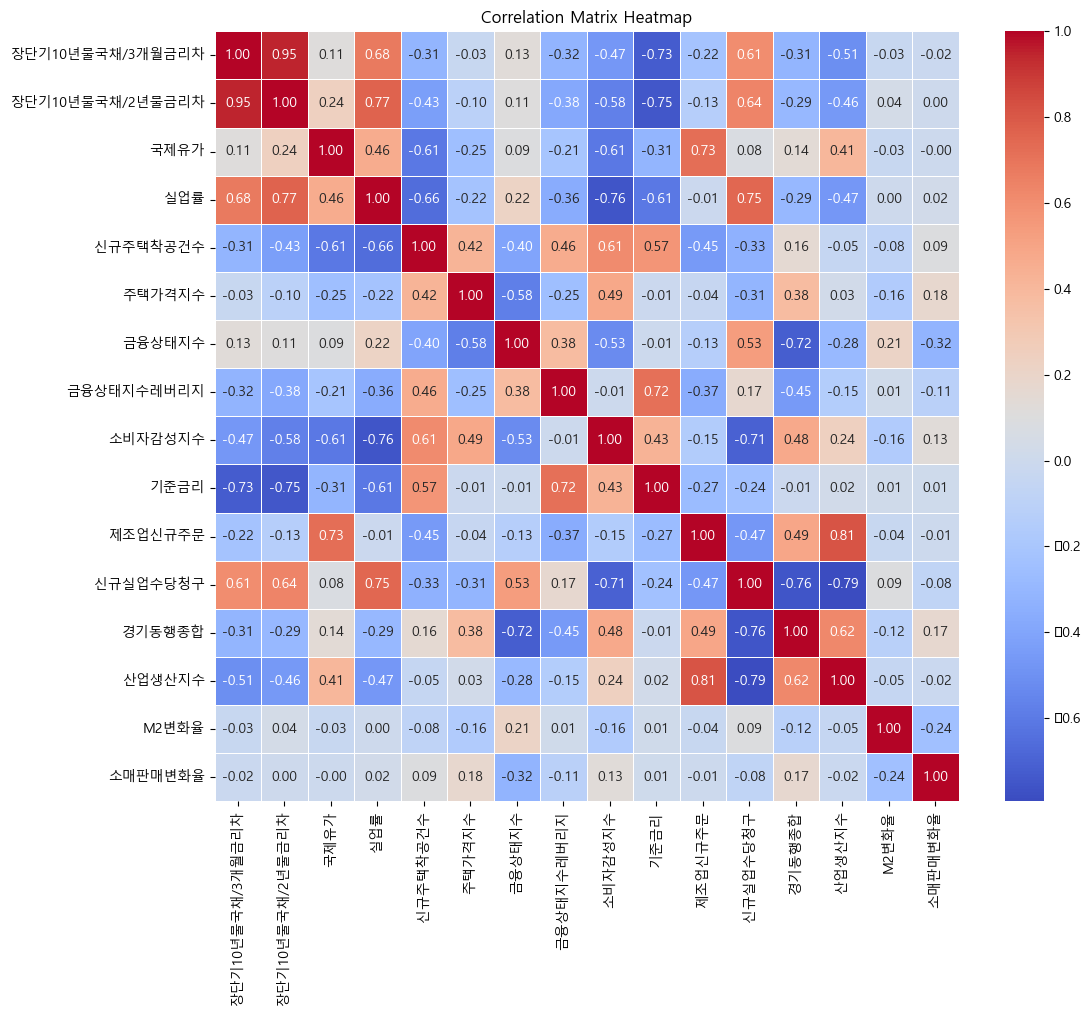

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'

# 상관 행렬 계산
correlation_matrix = economics[economics.columns].corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
